<a href="/assets/tutorial05_example.ipynb" class="link-button">Download</a>
<a href="https://colab.research.google.com/github/technion046195/technion046195/blob/master/content/tutorial05/example.ipynb" target="_blank">
<img src="../assets/colab-badge.svg" style="display:inline"/>
</a>

<center><h1>
תרגול5  - דוגמא מעשית
</h1></center>

## Setup

In [ ]:
## Importing packages
import os # A build in package for interacting with the OS. For example to create a folder.
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import imageio  # A package to read and write image (is used here to save gif images)
import tabulate  # A package from pretty printing tables
from graphviz import Digraph  # A package for plothing graphs (of nodes and edges)

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (4.5, 4.5)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations, pandas tables and images in cells output
from IPython.core.display import display, HTML, Latex, Markdown

## Create output folder
if not os.path.isdir('./output'):
    os.mkdir('./output')

### Data Inspection

In [ ]:
data_file = 'https://technion046195.netlify.app/datasets/titanic_manifest.csv'

## Loading the data
dataset = pd.read_csv(data_file)

## Print the number of rows in the data set
number_of_rows = len(dataset)
display(Markdown(f'Number of rows in the dataset: $N={number_of_rows}$'))

## Show the first 10 rows
dataset.head(10)

Number of rows in the dataset: $N=999$

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,numeric_sex
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",0
5,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1
6,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0
7,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1
8,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0
9,1,0,"Astor, Col. John Jacob",male,47,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY",0


### The Data Fields and Types
In this workshop we will use the following fields:
- **pclass**: the ticket's class: 1st, 2nd or 3rd: 1, 2 or 3
- **sex**: the sex of the passenger as a string: male or female
- **age**: the passenger's age: an integer
- **sibsp**: the number of Siblings/Spouses aboard for each passenger: an integer
- **parch**: the number of Parents/Children aboard for each passenger: an integer
- **fare**: The price the passenger payed for the ticket: a positive real number
- **embarked**: The port in which the passenger embarked the ship: (C = Cherbourg; Q = Queenstown; S = Southampton)

- **survived**: The label for whether or not this passenger has survived: 0 or 1

(A full description for each of the other columns can be found [here](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3info.txt))

## Train-test split

In [ ]:
n_samples = len(dataset)

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(0)

## Generating a vector of indices
indices = np.arange(n_samples)

## Shuffle the indices
rand_gen.shuffle(indices)

## Split the indices into 80% train / 20% test
n_samples_train = int(n_samples * 0.8)
train_indices = indices[:n_samples_train]
test_indices = indices[n_samples_train:]

train_set = dataset.iloc[train_indices]
test_set = dataset.iloc[test_indices]

## Train - validation split

In [ ]:
## Generating a vector of indices
indices = train_indices.copy()

## Shuffle the indices
rand_gen = np.random.RandomState(1)
rand_gen.shuffle(indices)

## Split the indices into 75% train / 25% validation
n_samples_train2 = int(n_samples_train * 0.75)
train2_indices = indices[:n_samples_train2]
val_indices = indices[n_samples_train2:]

train2_set = dataset.iloc[train2_indices]
val_set = dataset.iloc[val_indices]

## Some plots

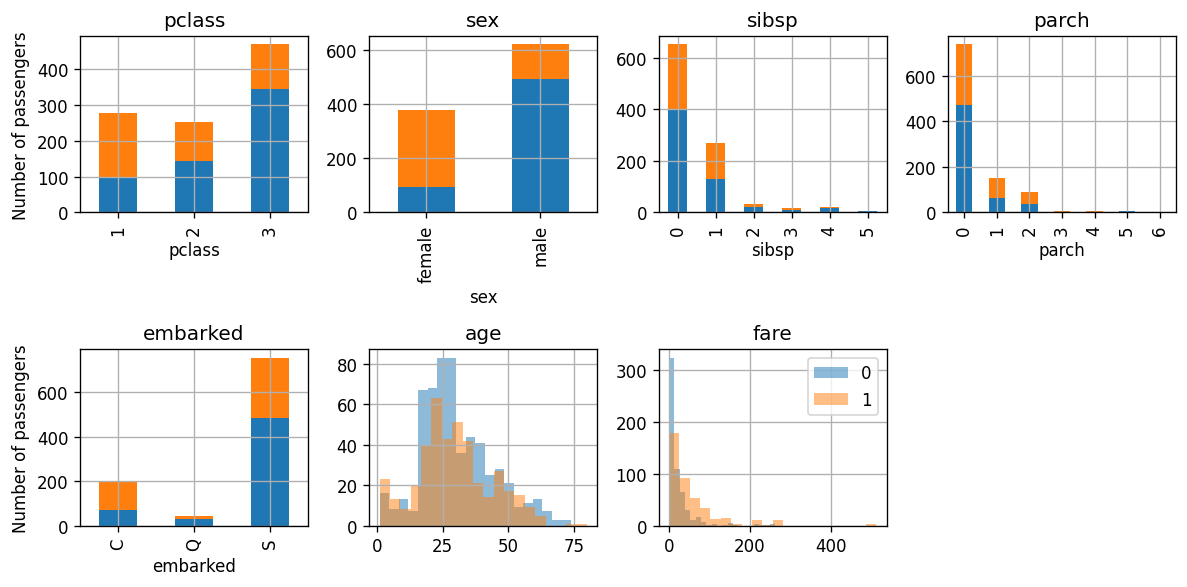

In [ ]:
discrete_columns = ['pclass', 'sex', 'sibsp', 'parch', 'embarked']
continuous_columns = ['age', 'fare']

## Plotting the histograms
fig, ax_list = plt.subplots(2, 4, figsize=(10, 5))
for i, feature in enumerate(discrete_columns):
    ax = ax_list.flat[i]
    dataset.groupby([feature, 'survived']).size().unstack('survived').plot.bar(ax=ax, stacked=True, legend=False)
    ax.set_title(feature)

for i, feature in enumerate(continuous_columns):
    ax = ax_list.flat[i + len(discrete_columns)]
    ax.hist(dataset.query('survived == 0')[feature].values, bins=20, alpha=0.5, label='0')
    ax.hist(dataset.query('survived == 1')[feature].values, bins=20, alpha=0.5, label='1')
    ax.set_title(feature)
    
for ax_list2 in ax_list:
    ax_list2[0].set_ylabel('Number of passengers')

ax_list.flat[-1].remove()
ax_list.flat[-2].legend()
plt.tight_layout()
fig.savefig('./output/titanic_data_slices.png', dpi=240)

## Building the tree

In [ ]:
node_style = {
    'style': 'filled',
    'fillcolor': '#DAE8FC',
    'color': '#6C8EBF',
    'penwidth': '3'
    }
edge_style = {
    'penwidth': '2'
    }

current_node_style = node_style.copy()
current_node_style.update({
    'fillcolor': '#D5E8D4',
    'color': '#82B366',
    'shape': 'ellipse',
    })

In [ ]:
def calc_gini(y_per_leaf, n_total):
    total_score = 0
    for y in y_per_leaf:
        n_leaf = len(y)
        if n_leaf == 0:
            continue
        p = y.mean()
        leaf_score = 2 * p * (1 - p)
        total_score += leaf_score * n_leaf / n_total
    return total_score

In [ ]:
def get_node_score_descrete(dataset, field, n_total):
    values = np.unique(dataset[field].values)
    y_per_leaf = []
    for val in values:
        indices = dataset[field].values == val
        y_per_leaf.append(dataset['survived'].loc[indices].values)
    score = calc_gini(y_per_leaf, n_total)
    return score

In [ ]:
def get_node_score_continuous(dataset, field, n_total):
    values = np.unique(dataset[field].values)
    best_score = np.inf
    best_threshold = None
    for value in np.unique(dataset[field].values):
        indices_low = dataset[field].values < value
        indices_high = dataset[field].values >= value
        y_per_leaf = [dataset['survived'].loc[indices_low].values, dataset['survived'].loc[indices_high].values]
        score = calc_gini(y_per_leaf, n_total)
        if score < best_score:
            best_score = score
            best_threshold = value
    
    return best_score, best_threshold

In [ ]:
def check_all(cur_dataset, n_total):
    scores = {}
    for field in ['pclass', 'sex', 'sibsp', 'parch', 'embarked']:
        scores[field] = get_node_score_descrete(cur_dataset, field, n_total)

    thresholds = {}
    for field in ['age', 'fare']:
        scores[field], thresholds[field] = get_node_score_continuous(cur_dataset, field, n_total)

    score_before = calc_gini([cur_dataset['survived'].values], n_total)
    print(f'Score before split: {score_before:.3f}')
    print('Scores:')
    best_field = min(scores, key=scores.get)

    for field, score in scores.items():
        print(f'- {field}'
              + (f' >= {thresholds[field]}' if field in thresholds else '')
              + f': {score:.3f}'
              + ('   <-' if field == best_field else ''))
    
    return scores, thresholds

In [ ]:
class Node:
    def __init__(self, index):
        self.is_leaf = True
        self.index = index
        self.queries = None
        self.next_nodes = None
        self.node_text = '?'
        self.branch_text = None
        self.prediction = np.nan
    
    def is_last(self):
        if self.is_leaf:
            return False
        else:
            return all([node.is_leaf for node in self.next_nodes])

    def find_split(self, dataset, n_total):
        scores, thresholds = check_all(dataset, n_total);
        best_field = min(scores, key=scores.get)
        if best_field in thresholds:
            self.queries = [
                f'{best_field}<{thresholds[best_field]}',
                f'{best_field}>={thresholds[best_field]}',
                ]
            self.next_nodes = [Node(self.index + '.1'), Node(self.index + '.2')]
            self.node_text = self.queries[1]
            self.branch_text = ['No', 'Yes']
        else:
            if pd.api.types.is_string_dtype(dataset[best_field]):
                values = np.unique(dataset[best_field].values)
                self.queries = [f'{best_field}=="{val}"' for val in values]
                self.next_nodes = [Node(self.index + f'.{i + 1}') for i in range(len(values))]
                self.node_text = best_field
                self.branch_text = values
            else:
                values = np.unique(dataset[best_field].values)
                self.queries = [f'{best_field}=={val}' for val in values]
                self.next_nodes = [Node(self.index + f'.{i + 1}') for i in range(len(values))]
                self.node_text = best_field
                self.branch_text = [f'{val}' for val in values]
        self.is_leaf = False
        
    def add_to_graph(self, tree_graph):
        if self.is_leaf:
            tree_graph.node(self.index, f'{self.prediction}', shape='plaintext')
        else:
            tree_graph.node(self.index, self.node_text, **node_style)
            for next_node, text in zip(self.next_nodes, self.branch_text):
                tree_graph.edge(self.index, next_node.index, text, **edge_style)
                next_node.add_to_graph(tree_graph)
    
    def __call__(self, dataset):
        out_nodes = pd.Series(self.index, index=dataset.index)
        if not self.is_leaf:
            for query, next_node in zip(self.queries, self.next_nodes):
                indices = dataset.query(query).index
                out_nodes[indices] = next_node.index
        return out_nodes

In [ ]:
class Tree:
    def __init__(self):
        self.nodes = [Node('node_1')]
    
    def gen_tree(self):
        tree_graph = Digraph(comment='Tree')
        tree_graph.format = 'png'
        tree_graph.node('root', '<<I><B>x</B></I>>', shape='plaintext')
        tree_graph.edge('root', self.nodes[0].index, **edge_style)
        
        self.nodes[0].add_to_graph(tree_graph)
        return tree_graph
    
    def get_leafs(self, dataset):
        leafs = pd.Series(self.nodes[0].index, index=dataset.index)
        for node in self.nodes:
            indices = leafs[leafs == node.index].index
            node_next_node = node(dataset.loc[indices])
            leafs.loc[node_next_node.index] = node_next_node.values
        return leafs
    
    def update_predictions(self, dateset):
        leafs = self.get_leafs(dataset)
        for node in self.nodes:
            indices = leafs[leafs == node.index].index
            if len(indices) > 0:
                node.prediction = dataset['survived'].loc[indices].mode()[0]
        
    def train(self, dataset, max_depth): 
        n_total = len(dataset)
        self.nodes = [Node('node_1')]
        nodes_in_next_level = self.nodes.copy()
        for _  in range(max_depth):
            nodes_in_level = nodes_in_next_level.copy()
            nodes_in_next_level = []
            for node in nodes_in_level:              
                print(node.index)
                tree_graph = self.gen_tree()
                tree_graph.node(node.index, '?', **current_node_style)
                display(tree_graph)
                tree_graph.render(f'./output/titanic_{node.index.replace(".", "_")}')
                
                leafs = self.get_leafs(dataset)
                indices = leafs[leafs == node.index].index
                cur_dataset = dataset.loc[indices]
                node.find_split(cur_dataset, n_total)
                new_nodes = node.next_nodes
                self.nodes += new_nodes
                nodes_in_next_level += new_nodes
                self.update_predictions(dataset)
        tree_graph = self.gen_tree()
        display(tree_graph)
        tree_graph.render(f'./output/titanic_after_train')
    
    def prune(self, dataset):
        finished = False
        while not finished:
            finished = True
            score = (self(dataset) != dataset['survived']).mean()
            for node in self.nodes:
                if (not node.is_leaf) and node.is_last():
                    node.is_leaf = True
                    score_without = (self(dataset) != dataset['survived']).mean()
                    if score_without <= score:
                        print(f'Removing node {node.index}. Score {score:.3f} -> {score_without:.3f}')
                        finished = False
                        break
                    else:
                        node.is_leaf = False
    
    def __call__(self, dataset):
        leafs = self.get_leafs(dataset)
        predictions = pd.Series(-1, index=dataset.index, dtype=int)
        for node in self.nodes:
            indices = leafs[leafs == node.index].index
            if len(indices) > 0:
                predictions.loc[indices] = int(node.prediction)

        return predictions

node_1


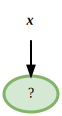

Score before split: 0.492
Scores:
- pclass: 0.436
- sex: 0.360   <-
- sibsp: 0.479
- parch: 0.473
- embarked: 0.460
- age >= 9: 0.488
- fare >= 15.7417: 0.448
node_1.1


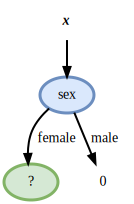

Score before split: 0.146
Scores:
- pclass: 0.109   <-
- sex: 0.146
- sibsp: 0.140
- parch: 0.143
- embarked: 0.130
- age >= 48: 0.142
- fare >= 10.5: 0.126
node_1.2


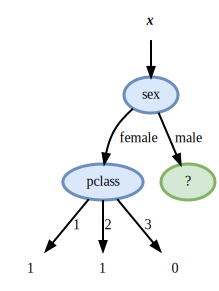

Score before split: 0.214
Scores:
- pclass: 0.202   <-
- sex: 0.214
- sibsp: 0.212
- parch: 0.209
- embarked: 0.205
- age >= 10: 0.207
- fare >= 26.2875: 0.205
node_1.1.1


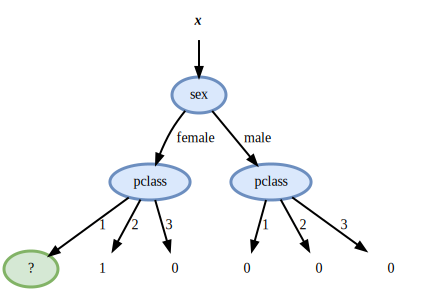

Score before split: 0.010
Scores:
- pclass: 0.010
- sex: 0.010
- sibsp: 0.009
- parch: 0.008
- embarked: 0.009
- age >= 15: 0.007   <-
- fare >= 151.55: 0.009
node_1.1.2


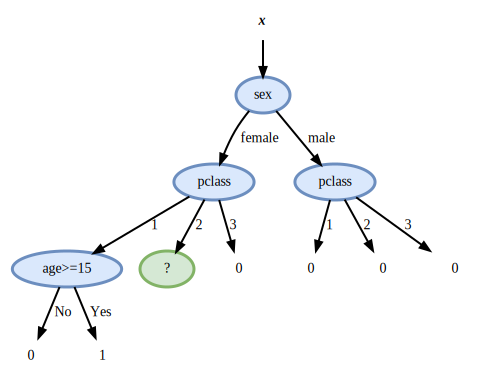

Score before split: 0.026
Scores:
- pclass: 0.026
- sex: 0.026
- sibsp: 0.025
- parch: 0.025
- embarked: 0.025
- age >= 60: 0.023   <-
- fare >= 26.25: 0.025
node_1.1.3


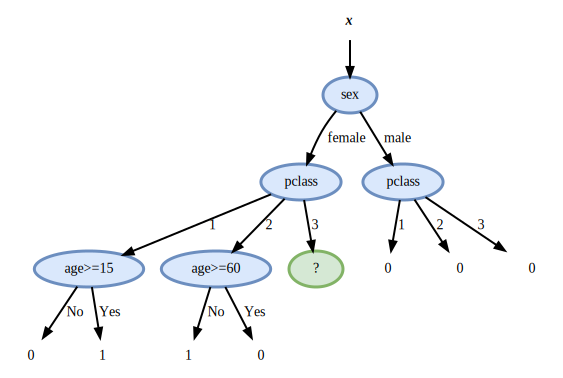

Score before split: 0.073
Scores:
- pclass: 0.073
- sex: 0.073
- sibsp: 0.071
- parch: 0.072
- embarked: 0.069   <-
- age >= 39: 0.070
- fare >= 27.9: 0.070
node_1.2.1


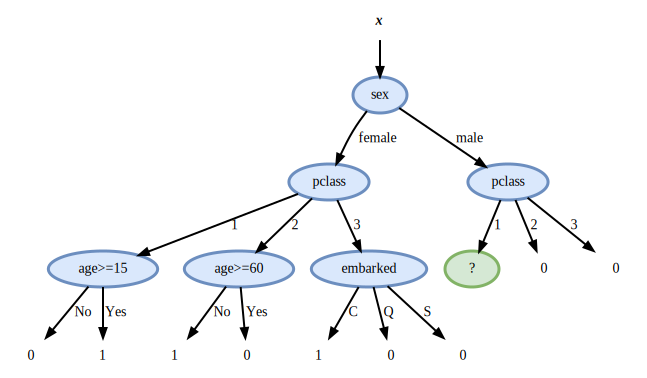

Score before split: 0.068
Scores:
- pclass: 0.068
- sex: 0.068
- sibsp: 0.068
- parch: 0.066
- embarked: 0.064
- age >= 55: 0.061   <-
- fare >= 26.2875: 0.064
node_1.2.2


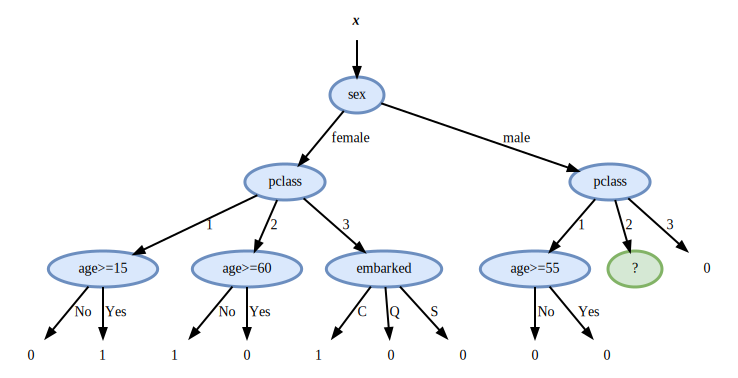

Score before split: 0.034
Scores:
- pclass: 0.034
- sex: 0.034
- sibsp: 0.034
- parch: 0.029
- embarked: 0.034
- age >= 14: 0.021   <-
- fare >= 41.5792: 0.034
node_1.2.3


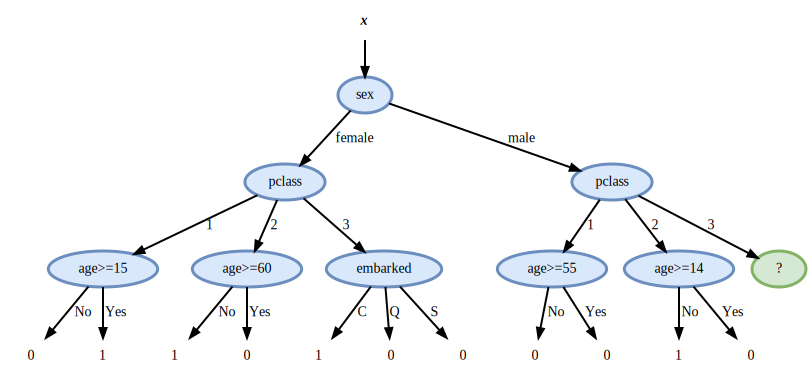

Score before split: 0.100
Scores:
- pclass: 0.100
- sex: 0.100
- sibsp: 0.098
- parch: 0.099
- embarked: 0.100
- age >= 33: 0.098
- fare >= 7.85: 0.097   <-


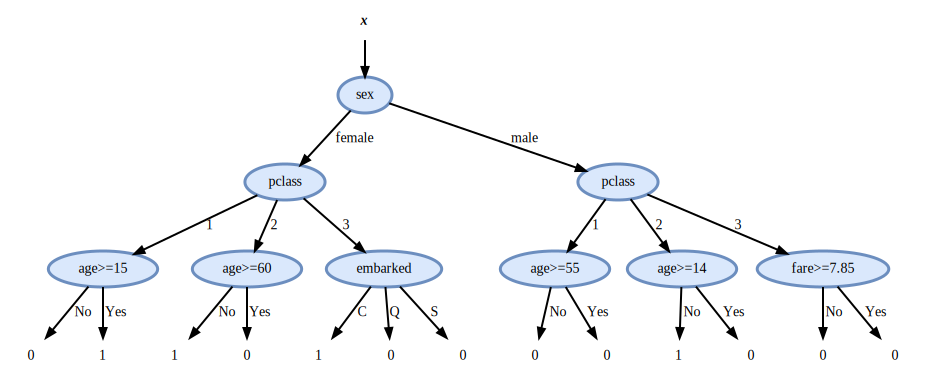

In [ ]:
tree = Tree()
tree.train(train2_set, max_depth=3)

In [ ]:
train_score = (tree(train2_set) != train2_set['survived']).mean()
print(f'Train score: {train_score:.3f}')

val_score = (tree(val_set) != val_set['survived']).mean()
print(f'Validation score: {val_score:.3f}')

test_score = (tree(test_set) != test_set['survived']).mean()
print(f'Test score: {test_score:.3f}')

Train score: 0.207
Validation score: 0.140
Test score: 0.205


## Pruning

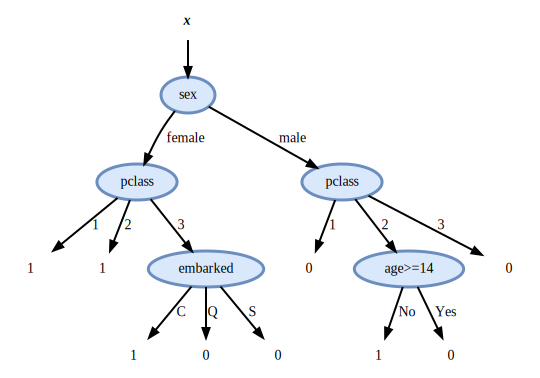

'./output/titanic_after_pruning.png'

In [ ]:
tree.prune(val_set)
tree.update_predictions(train_set)
tree_graph=tree.gen_tree()
display(tree_graph)
tree_graph.render(f'./output/titanic_after_pruning')

In [ ]:
test_score = (tree(test_set) != test_set['survived']).mean()
print(f'Test score: {test_score:.3f}')

Test score: 0.205
